In [1]:
import pandas as pd
import numpy as np
import seaborn as sb; 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('owid-covid-data.csv')

In [3]:
df_sg = df.loc[df['location'] == 'Singapore']

In [38]:
sub = df_sg.loc[df_sg['date'] == '2021-04-20']["total_cases"].values[0]
sub_delta = df_sg.loc[df_sg['date'] == '2021-12-25']["total_cases"].values[0]

In [39]:
sub_delta

277555.0

In [40]:
b4_delta = pd.DataFrame(df_sg.loc[df_sg['date'] < '2021-04-21']["total_cases"])
delta = pd.DataFrame(df_sg.loc[(df_sg['date'] >= '2021-04-21') &(df_sg['date'] < '2021-12-26')]["total_cases"])
omicron = pd.DataFrame(df_sg.loc[df_sg['date'] >= '2021-12-26']["total_cases"])

In [41]:
delta = delta - sub
omicron = omicron - sub_delta

In [42]:
l = pd.DataFrame(df_sg["location"])

In [43]:
time = pd.DataFrame(df_sg["date"])

In [44]:
case = pd.DataFrame(df_sg.loc[df_sg['date'] < '2021-03-01']["total_cases"])
case2 = pd.DataFrame(df_sg.loc[df_sg['date'] >= '2021-04-21']["total_cases"])
case3 = pd.DataFrame(df_sg.loc[df_sg['date'] >= '2021-12-26']["total_cases"])

In [45]:
pd.concat([l,time,case],axis=1).dropna().head()

,location,date,total_cases
142218,Singapore,2020-01-23,1.0
142219,Singapore,2020-01-24,3.0
142220,Singapore,2020-01-25,3.0
142221,Singapore,2020-01-26,4.0
142222,Singapore,2020-01-27,5.0


In [46]:
pd.concat([l,time,case2],axis=1).dropna().head()

,location,date,total_cases
142672,Singapore,2021-04-21,60880.0
142673,Singapore,2021-04-22,60904.0
142674,Singapore,2021-04-23,60943.0
142675,Singapore,2021-04-24,60966.0
142676,Singapore,2021-04-25,61006.0


In [47]:
pd.concat([l,time,case3],axis=1).dropna().head()

,location,date,total_cases
142921,Singapore,2021-12-26,277764.0
142922,Singapore,2021-12-27,278044.0
142923,Singapore,2021-12-28,278409.0
142924,Singapore,2021-12-29,278750.0
142925,Singapore,2021-12-30,279061.0


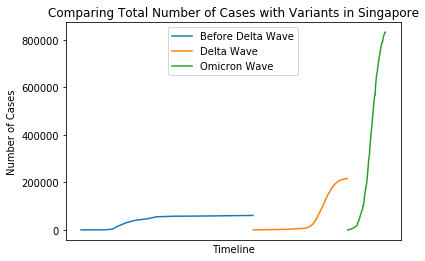

In [48]:
plt.title('Comparing Total Number of Cases with Variants in Singapore')
plt.ylabel('Number of Cases')
plt.xlabel('Timeline')
plt.xticks([])
plt.plot(b4_delta,label='Before Delta Wave')
plt.plot(delta,label='Delta Wave')
plt.plot(omicron,label='Omicron Wave')
leg = plt.legend(loc='upper center')
plt.show()